## The purpose of this notebook is to evalaate whether LinearRegression is a suitable approach to understand and predict market caps of corporations, based on a large number of features and a dataset of corporation financial information

## NOTE: All the values represented are in millions

In [1]:
# Standard Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from statistics import mean
%matplotlib inline
path = './Private/Data/MasterDataset.csv'
conversion_factor = 1000000

In [2]:
master_frame = pd.read_csv(path, sep='\t')
master_frame.drop(['Unnamed: 0'],axis=1,inplace=True)
master_frame.dropna(inplace=True)

In [3]:
y_values = master_frame['current_market_cap_usd']
master_frame.drop(['current_ebit'],axis=1, inplace=True)
master_frame.drop(['current_market_cap_usd'],axis=1, inplace=True)
master_frame.drop(['quote_symbol'],axis=1, inplace=True)
master_frame.drop(['sedol'],axis=1, inplace=True)
master_frame.drop(['country'],axis=1, inplace=True)
master_frame.drop(['exchange'],axis=1, inplace=True)
master_frame.drop(['primary_sic_code'],axis=1, inplace=True)
master_frame.drop(['current_price_close'],axis=1, inplace=True)

## Feature List post dropping irrelevant columns:

In [4]:
for column in master_frame.columns:
    print(column)

current_sales
current_ebitda
current_net_income
current_total_assets
current_total_liabilities
current_pe_ratio
actual_eps
current_price_/_cash
current_price_/_sales
dividend_yield


In [5]:
# Performing a 60-30 train test split
x_train, x_test, y_train, y_test = train_test_split(master_frame,y_values,test_size=0.3,random_state=101)

In [6]:
reg = LinearRegression().fit(x_train, y_train)

In [7]:
#Score with exact training values
reg.score(x_train,y_train)

0.6618549770421974

## Experimenting with some existing metrics to score the current model

In [8]:
y_predictions = reg.predict(x_test)
y_test = y_test.values

In [9]:
# Absolute scoring
abs_percentage = reg.score(x_test,y_test)
print("Raw Accuracy = {}%".format(abs_percentage*100))

Raw Accuracy = 71.50427048173813%


In [10]:
#Scoring using a root mean squared error
rmse = sqrt(mean_squared_error(y_test,y_predictions))
print("Root Mean Squared Error: {}".format(rmse))

Root Mean Squared Error: 9486.255510027799


## Trying to narrow the features down to a more concise set - this approach had no clear benefit and is discarded for now

In [11]:
'''
master_frame['ebitda_to_sales'] = master_frame['current_ebitda']/master_frame['current_sales']
master_frame.drop(['current_ebitda'],axis=1, inplace=True)
master_frame.drop(['current_sales'],axis=1, inplace=True)

master_frame.drop(['current_net_income'],axis=1, inplace=True)
master_frame['net_assets'] = master_frame['current_total_assets'] - master_frame['current_total_liabilities']
#master_frame.drop(['current_total_assets'],axis=1, inplace=True)
#master_frame.drop(['current_total_liabilities'],axis=1, inplace=True)
#master_frame.drop(['current_price_/_sales'],axis=1, inplace=True)

x_train, x_test, y_train, y_test = train_test_split(master_frame,y_values,test_size=0.3,random_state=101)

reg = LinearRegression().fit(x_train, y_train)
reg.score(x_train,y_train)

## Experimenting with some existing metrics to score the current model

y_predictions = reg.predict(x_test)
y_test = y_test.values

# Absolute scoring
abs_percentage = reg.score(x_test,y_test)
print("Raw Accuracy = {}%".format(abs_percentage*100))

#Scoring using a root mean squared error
rmse = sqrt(mean_squared_error(y_test,y_predictions))
print("Root Mean Squared Error: {}".format(rmse))

## Narrowing down features doesn't make a substantial impact to the model

## Resetting the dataframe

master_frame = pd.read_csv(path, sep='\t')
master_frame.drop(['Unnamed: 0'],axis=1,inplace=True)
master_frame.dropna(inplace=True)

y_values = master_frame['current_market_cap_usd']
master_frame.drop(['current_ebit'],axis=1, inplace=True)
master_frame.drop(['current_market_cap_usd'],axis=1, inplace=True)
master_frame.drop(['quote_symbol'],axis=1, inplace=True)
master_frame.drop(['sedol'],axis=1, inplace=True)
master_frame.drop(['country'],axis=1, inplace=True)
master_frame.drop(['exchange'],axis=1, inplace=True)
master_frame.drop(['primary_sic_code'],axis=1, inplace=True)
master_frame.drop(['current_price_close'],axis=1, inplace=True)

# Performing a 60-30 train test split
x_train, x_test, y_train, y_test = train_test_split(master_frame,y_values,test_size=0.3,random_state=101)

reg = LinearRegression().fit(x_train, y_train)

#Score with exact training values
reg.score(x_train,y_train)

y_predictions = reg.predict(x_test)
y_test = y_test.values
'''

'\nmaster_frame[\'ebitda_to_sales\'] = master_frame[\'current_ebitda\']/master_frame[\'current_sales\']\nmaster_frame.drop([\'current_ebitda\'],axis=1, inplace=True)\nmaster_frame.drop([\'current_sales\'],axis=1, inplace=True)\n\nmaster_frame.drop([\'current_net_income\'],axis=1, inplace=True)\nmaster_frame[\'net_assets\'] = master_frame[\'current_total_assets\'] - master_frame[\'current_total_liabilities\']\n#master_frame.drop([\'current_total_assets\'],axis=1, inplace=True)\n#master_frame.drop([\'current_total_liabilities\'],axis=1, inplace=True)\n#master_frame.drop([\'current_price_/_sales\'],axis=1, inplace=True)\n\nx_train, x_test, y_train, y_test = train_test_split(master_frame,y_values,test_size=0.3,random_state=101)\n\nreg = LinearRegression().fit(x_train, y_train)\nreg.score(x_train,y_train)\n\n## Experimenting with some existing metrics to score the current model\n\ny_predictions = reg.predict(x_test)\ny_test = y_test.values\n\n# Absolute scoring\nabs_percentage = reg.score(x

## Using a modified RMSE function with a percentile acceptable bound, in order to better understand our outputs

In [12]:
bound = 0.1
def calc_bounded_error(y_pred, y_real):
    lower = y_real*(1-bound)
    upper = y_real*(1+bound)
    difference_low = (y_pred-lower)**2
    difference_up = (y_pred-upper)**2
    if difference_up > difference_low:
        return difference_low
    return difference_up

In [13]:
def modified_rmse(y_predictions, y_tests):
    my_list = []
    for i in range(0,len(y_predictions)):
        my_list.append(calc_bounded_error(y_predictions[i],y_tests[i]))
    mean_val = mean(my_list)
    modified_rmse = sqrt(mean_val)
    return modified_rmse

In [14]:
modified_rmse(y_predictions, y_test)

8007.189188726884

#TODO:
Extract more data, in order to improve the regression model & explore the usage of a DNNRegressor in order to check whether that produces any better results

## Plotting each feature against the output, to better understand the model fit

In [15]:
# To plot: x_test, y_test, y_predictions
x_plots = []
for column in x_test.columns:
    x_plots.append(x_test[column])
    print(column)

current_sales
current_ebitda
current_net_income
current_total_assets
current_total_liabilities
current_pe_ratio
actual_eps
current_price_/_cash
current_price_/_sales
dividend_yield


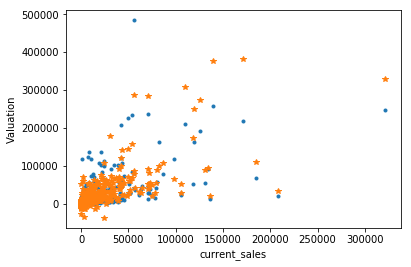

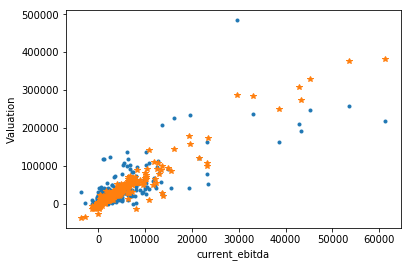

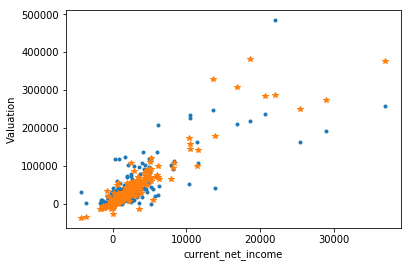

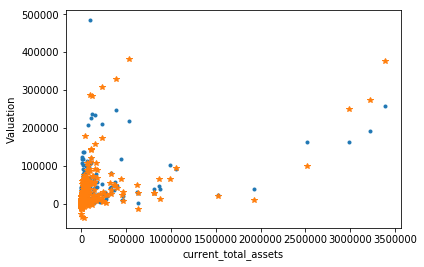

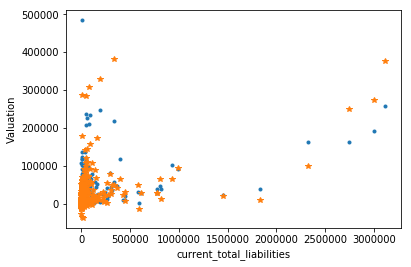

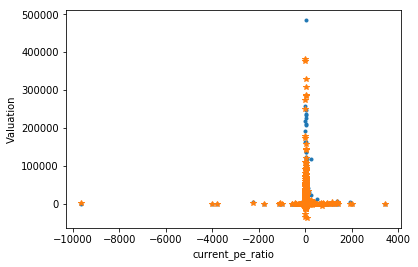

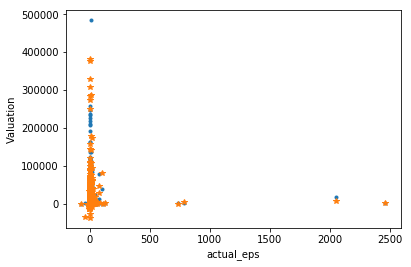

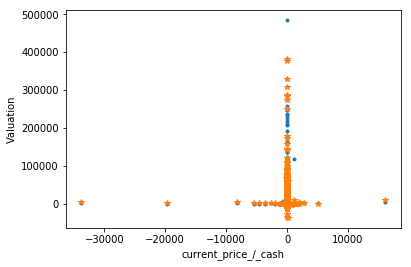

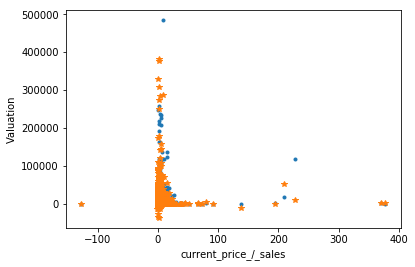

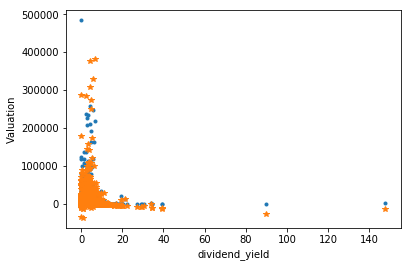

In [16]:
count = 0
for value in x_plots:
    plt.xlabel(x_test.columns[count])
    plt.ylabel("Valuation")
    plt.plot(value, y_test, '.')
    plt.plot(value, y_predictions, '*')
    count += 1
    plt.show()

### Notes:
- The presence of 20,000 datapoints instead of 3,000 brings the RMSE down (as expected) from 30,000 to 8,000
- From the graphs above, it is evident that regression is able to somewhat fit to the data, but there is definitely scope for improvement. 
- The 66% accuracy is not an accurate representation of model performance, solely due to the fact that this is a regression model. The accuracy metric has been added only for completeness.

In [17]:
# TODO: Explore the usage of a DNNRegressor in order to check whether that produces any better results